In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
# Loading the dataset
df = pd.read_csv("metadata.csv")

# Drop rows missing key info
df = df.dropna(subset=["title", "abstract", "publish_time"])
df["publish_time"] = pd.to_datetime(df["publish_time"], errors="coerce")
df = df.dropna(subset=["publish_time"])


C:\Users\LIKALANI\AppData\Local\Temp\ipykernel_2476\1509032027.py:2: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("metadata.csv")


In [7]:
#data exploratin
# ✅ Check DataFrame dimensions
print(f"Shape of the dataset: {df.shape}")  # (rows, columns)

# ✅ Identify data types of each column
print("\nData types of each column:")
print(df.dtypes)

# ✅ Check for missing values in important columns
important_columns = ["title", "abstract", "publish_time", "journal"]
print("\nMissing values in key columns:")
print(df[important_columns].isnull().sum())

# ✅ Generate basic statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())



Shape of the dataset: (415488, 19)

Data types of each column:
cord_uid                    object
sha                         object
source_x                    object
title                       object
doi                         object
pmcid                       object
pubmed_id                   object
license                     object
abstract                    object
publish_time        datetime64[ns]
authors                     object
journal                     object
mag_id                     float64
who_covidence_id            object
arxiv_id                    object
pdf_json_files              object
pmc_json_files              object
url                         object
s2_id                      float64
dtype: object

Missing values in key columns:
title               0
abstract            0
publish_time        0
journal         35193
dtype: int64

Summary statistics for numerical columns:
                        publish_time  mag_id         s2_id
count                  

In [8]:
# ✅ Convert publish_time to datetime format
df["publish_time"] = pd.to_datetime(df["publish_time"], errors="coerce")

# ✅ Extract year from publish_time
df["year"] = df["publish_time"].dt.year

# ✅ Create abstract word count column
df["abstract_word_count"] = df["abstract"].fillna("").apply(lambda x: len(x.split()))


In [9]:
# ✅ Count papers by publication year
year_counts = df["year"].value_counts().sort_index()
print("📅 Papers by Publication Year:")
print(year_counts)

# ✅ Identify top journals publishing COVID-19 research
top_journals = df["journal"].value_counts().head(10)
print("\n🏛️ Top Journals Publishing COVID-19 Research:")
print(top_journals)

# ✅ Find most frequent words in titles (simple word frequency)
from collections import Counter
import re

# Combine all titles into one string
titles = " ".join(df["title"].dropna().tolist()).lower()

# Extract words (4+ letters to filter noise)
words = re.findall(r'\b[a-z]{4,}\b', titles)
common_words = Counter(words).most_common(20)

print("\n🔤 Most Frequent Words in Titles:")
for word, count in common_words:
    print(f"{word}: {count}")


📅 Papers by Publication Year:
year
1879         1
1955         1
1957         1
1962         1
1963         1
         ...  
2019      5119
2020    118397
2021    182324
2022     74245
2023         1
Name: count, Length: 62, dtype: int64

🏛️ Top Journals Publishing COVID-19 Research:
journal
bioRxiv                            8873
Int J Environ Res Public Health    8192
PLoS One                           7145
Sci Rep                            4078
Front Psychol                      3103
Cureus                             2951
Viruses                            2566
BMJ Open                           2556
Front Immunol                      2549
Int J Mol Sci                      2294
Name: count, dtype: int64

🔤 Most Frequent Words in Titles:
covid: 151922
with: 70449
sars: 45207
pandemic: 42589
during: 38551
study: 38313
patients: 37775
from: 30864
health: 27637
analysis: 23681
review: 22100
disease: 21931
based: 21386
infection: 20466
care: 18813
coronavirus: 17639
impact: 16302
amon

C:\Users\LIKALANI\AppData\Local\Temp\ipykernel_2476\2279337565.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette="crest")
C:\Users\LIKALANI\AppData\Local\Temp\ipykernel_2476\2279337565.py:12: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\LIKALANI\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


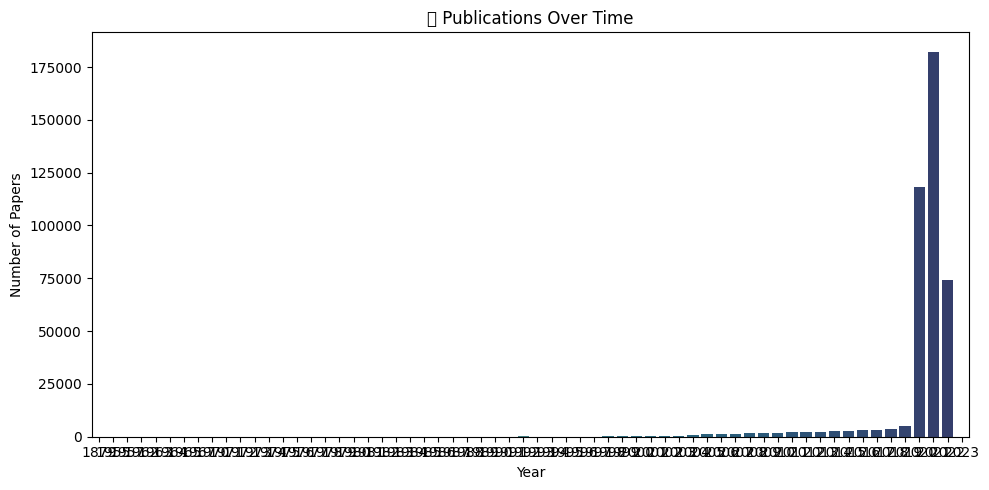

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count by year
year_counts = df["year"].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=year_counts.index, y=year_counts.values, palette="crest")
plt.title("📅 Publications Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.tight_layout()
plt.show()


C:\Users\LIKALANI\AppData\Local\Temp\ipykernel_2476\1452088885.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_journals.index, x=top_journals.values, palette="flare")
C:\Users\LIKALANI\AppData\Local\Temp\ipykernel_2476\1452088885.py:9: UserWarning: Glyph 127963 (\N{CLASSICAL BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\LIKALANI\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127963 (\N{CLASSICAL BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


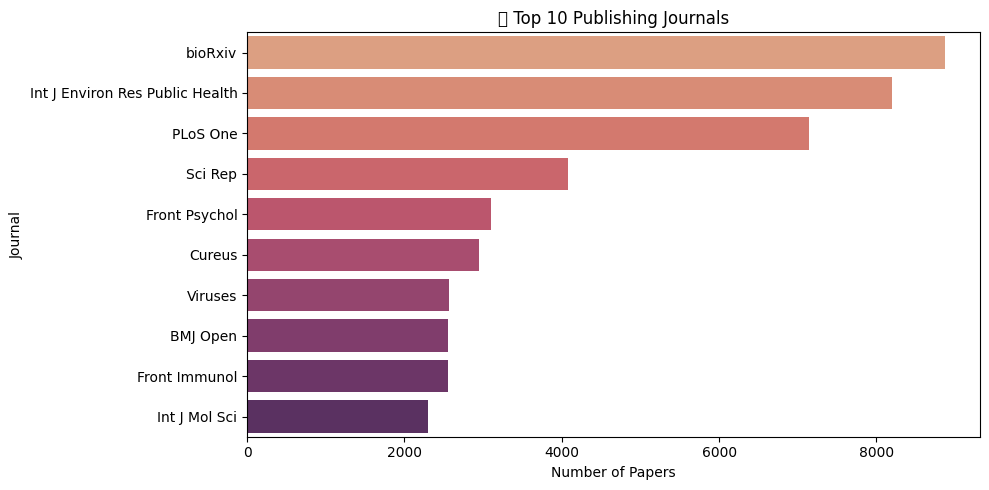

In [11]:
# 🤕top publishing journals
top_journals = df["journal"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=top_journals.index, x=top_journals.values, palette="flare")
plt.title("🏛️ Top 10 Publishing Journals")
plt.xlabel("Number of Papers")
plt.ylabel("Journal")
plt.tight_layout()
plt.show()


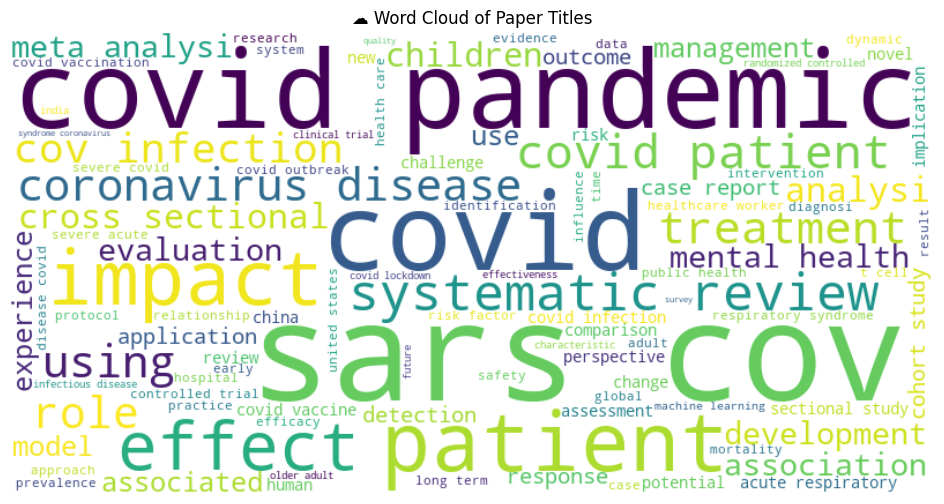

In [12]:
# word cloud of titles
from wordcloud import WordCloud

# Combine all titles
titles = " ".join(df["title"].dropna().tolist()).lower()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=100).generate(titles)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("☁️ Word Cloud of Paper Titles")
plt.show()


C:\Users\LIKALANI\AppData\Local\Temp\ipykernel_2476\1003416388.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=source_counts.index, x=source_counts.values, palette="rocket")
C:\Users\LIKALANI\AppData\Local\Temp\ipykernel_2476\1003416388.py:11: UserWarning: Glyph 128450 (\N{CARD INDEX DIVIDERS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\LIKALANI\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128450 (\N{CARD INDEX DIVIDERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


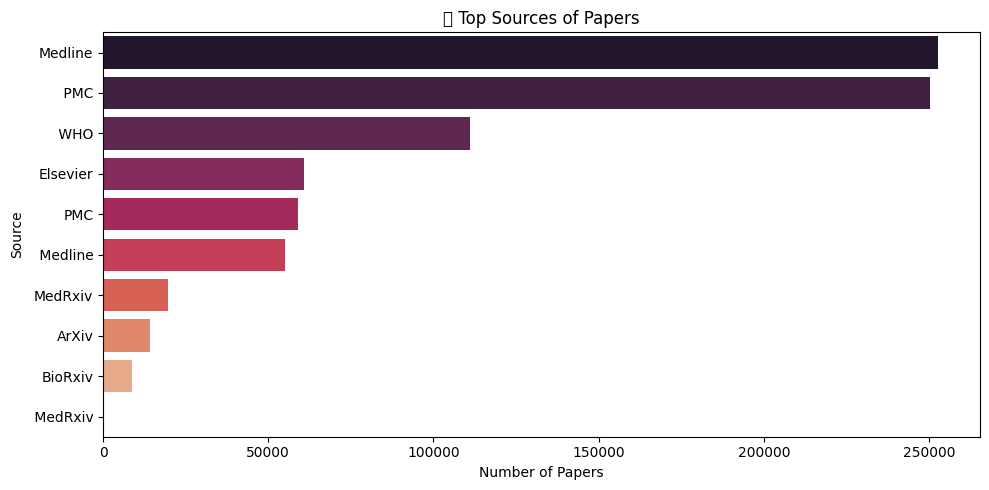

In [13]:
# Some entries have multiple sources separated by semicolons
df["source_x"] = df["source_x"].fillna("")
sources = df["source_x"].str.split(";").explode()
source_counts = sources.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=source_counts.index, x=source_counts.values, palette="rocket")
plt.title("🗂️ Top Sources of Papers")
plt.xlabel("Number of Papers")
plt.ylabel("Source")
plt.tight_layout()
plt.show()
